In [2]:
##Import Libraries##

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
import pandas as pd
from scipy.interpolate import interp1d

In [3]:
################ SPHERE CALCULATIONS ##########################

Enter a value for x: 23.35
For x = 23.35, the corresponding t value is: 1.004


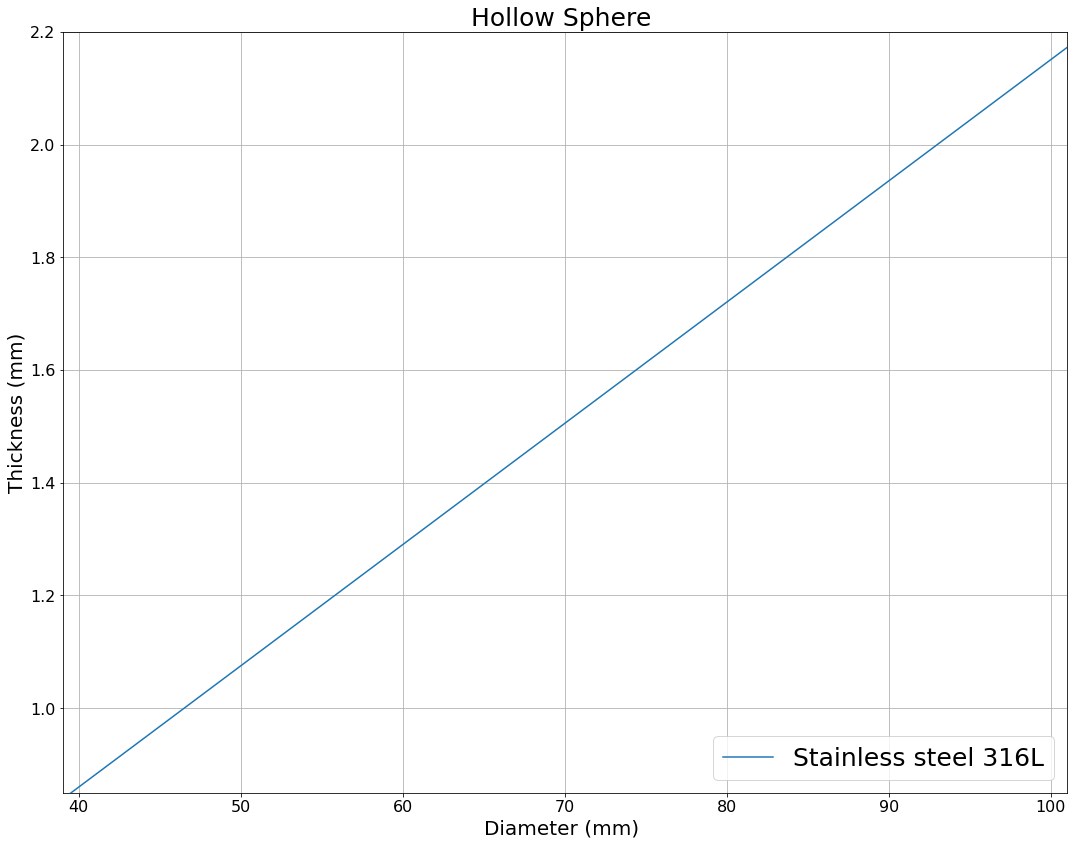

In [4]:
########################## Hollow Sphere ##############################3
R = 8.09314 # value of density ratio at T = 50C
# Define the equation to solve for t
def equation(t, x):
    return R * (3 * t * x**2 - 3 * x * t**2 + t**3) - x**3
x_values = np.linspace(10, 100, 500)  # 500 points for smooth plot
t_values = []
for x in x_values:
    root = fsolve(equation, x0=0.01, args=(x))  # Initial guess for t
    real_roots = root[np.isreal(root)].real  # Extract real solutions
    if len(real_roots) > 0:
        t_values.append(real_roots[0])  # Choose the first valid root
    else:
        t_values.append(np.nan)  # Avoid complex solutions
x_values = np.array(x_values)
t_values = np.array(t_values)
x_value = float(input("Enter a value for x: "))
root = fsolve(equation, x0=0.01, args=(x_value))  # Initial guess for t
real_roots = root[np.isreal(root)].real  # Extract real solutions
if len(real_roots) > 0:
    t_value = real_roots[0]  # Choose the first valid root
    print(f"For x = {x_value:.2f}, the corresponding t value is: {t_value:.3f}")
else:
    print("No real solution found.")

plt.figure(figsize=(18, 14))
plt.plot(x_values*2, t_values)

plt.legend(["Stainless steel 316L"], loc="lower right", fontsize=25)
plt.ylabel("Thickness (mm)", fontsize=20)
plt.xlabel("Diameter (mm) ", fontsize=20)
plt.title("Hollow Sphere ", fontsize=25)
plt.xlim([39, 101])
plt.ylim([0.85, 2.2])
plt.grid(True)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

In [5]:
#SPHRE MASS
rho = 8000         # density of stainless steal at 20C
x = 0.02335        # radius in meters
t = 0.001          # thickness in meters
pi = 3.141592
m = rho*4/3*pi*(3*t*x**2-3*x*t**2+t**3)*1000
print(f"mass has to be exact: {m:.6f} grams")

mass has to be exact: 52.497845 grams


In [7]:
############################ SPHERE MASS barriers #####################
rho = 8000
# max radius       (+0.0005m)
x_max = 0.0234         #value in meters
# min radius       (-0.0005m)
x_min = 0.0233         
t = 0.001
pi = 3.141592
a = 16*10**-6
DT = 30

# Compute m
m_max = rho*4/3*pi*(3*t*x_max**2-3*x_max*t**2+t**3)
Vp_max = 4/3*pi*(x_max**3)*(1+a*DT)**3
ρ_min = m_max/Vp_max

print(f"max mass: {m_max*1000:.4f} grams")
print(f"min density: {ρ_min:.4f} kg/m^3")

m_min = rho*4/3*pi*(3*t*x_min**2-3*x_min*t**2+t**3)
Vp_min = 4/3*pi*(x_min**3)*(1+a*DT)**3
ρ_max = m_min/Vp_min

print(f"min mass: {m_min*1000:.4f} grams")
print(f"max density: {ρ_max:.4f} kg/m^3")

max mass: 52.7278 grams
min density: 981.0212 kg/m^3
min mass: 52.2684 grams
max density: 985.0484 kg/m^3


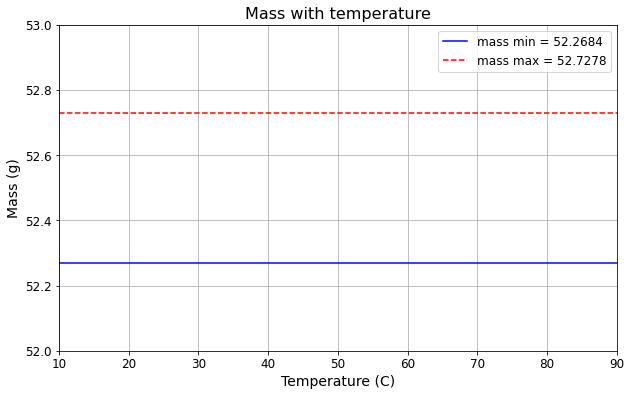

In [8]:
##################### MASS PLOT ############################
mmax = 52.7278
mmin = 52.2684
plt.figure(figsize=(10, 6))
plt.axhline(y=mmin, color='blue', linestyle='-', label=f'mass min = {mmin}')
plt.axhline(y=mmax, color='red', linestyle='--', label=f'mass max = {mmax}')
plt.xlabel("Temperature (C)", fontsize=14)
plt.ylabel("Mass (g)", fontsize=14)
plt.title("Mass with temperature", fontsize=16)
plt.xlim(10, 90)
plt.ylim(52, 53)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

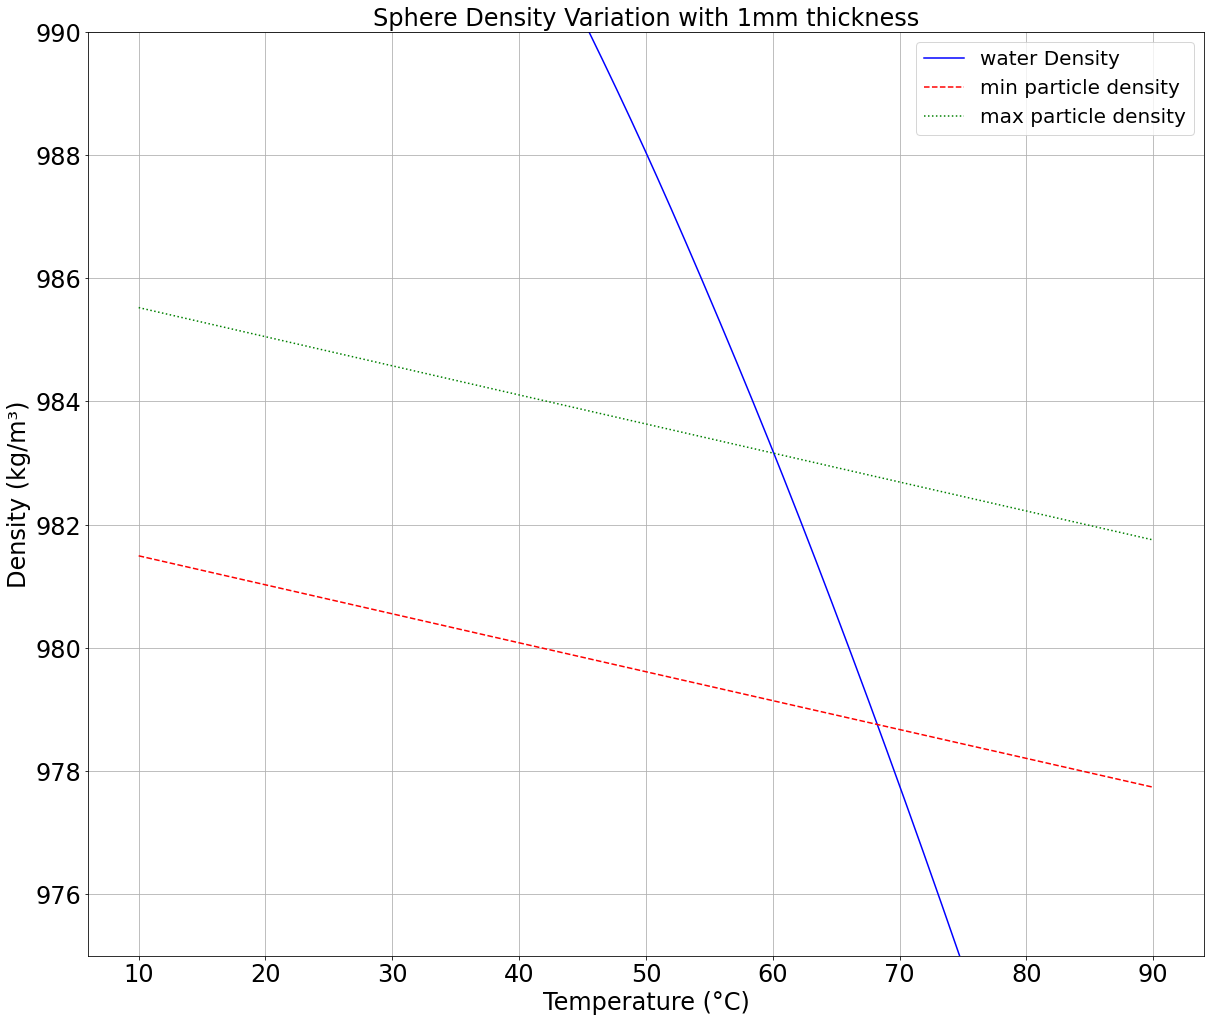

In [9]:
############################### Sphere Density Variation with 1mm thickness ############################

temperature_data = np.array([10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100])
density_data = np.array([999.7, 999.1, 998.21, 997.05, 995.65, 994.03, 992.22, 990.21, 988.04, 985.69, 
                         983.2, 980.55, 977.76, 974.84, 971.79, 968.61, 965.31, 961.89, 958.35])

# Define constants for equations 2 and 3
a = 16 * 10**-6
To = 20
rho_pmax = 985.0484
rho_pmin = 981.0212

# Define x values (temperature range from 10°C to 90°C)
x_values = np.linspace(10, 90, 500)

# Interpolate the density data to estimate values between given points
interpolated_density = interp1d(temperature_data, density_data, kind='cubic')

# Compute y values for equation 2 and 3
y2min_values = rho_pmin / (1 + 3 * a * (x_values - To))  # Equation 2
y2max_values = rho_pmax / (1 + 3 * a * (x_values - To))  # Equation 3

# Get the interpolated y-values from data for equation 1
y_values = interpolated_density(x_values)  # Interpolated density values

plt.figure(figsize=(20, 17))
plt.tick_params(axis='both', labelsize=24)  # Increase tick label size for both axes
plt.plot(x_values, y_values, label="water Density ", color='blue', linestyle='solid')
plt.plot(x_values, y2min_values, label= 'min particle density', color='red', linestyle='dashed')
plt.plot(x_values, y2max_values, label= 'max particle density', color='green', linestyle='dotted')

plt.title("Sphere Density Variation with 1mm thickness", fontsize=24)
plt.xlabel("Temperature (°C)", fontsize=24)
plt.ylabel("Density (kg/m³)", fontsize=24)
plt.legend(fontsize=20)
plt.ylim([975, 990])
plt.grid(True)
plt.show()

max mass: 175.2730 grams
min density: 988.0226 kg/m^3
min mass: 176.3027 grams
max density: 985.3180 kg/m^3


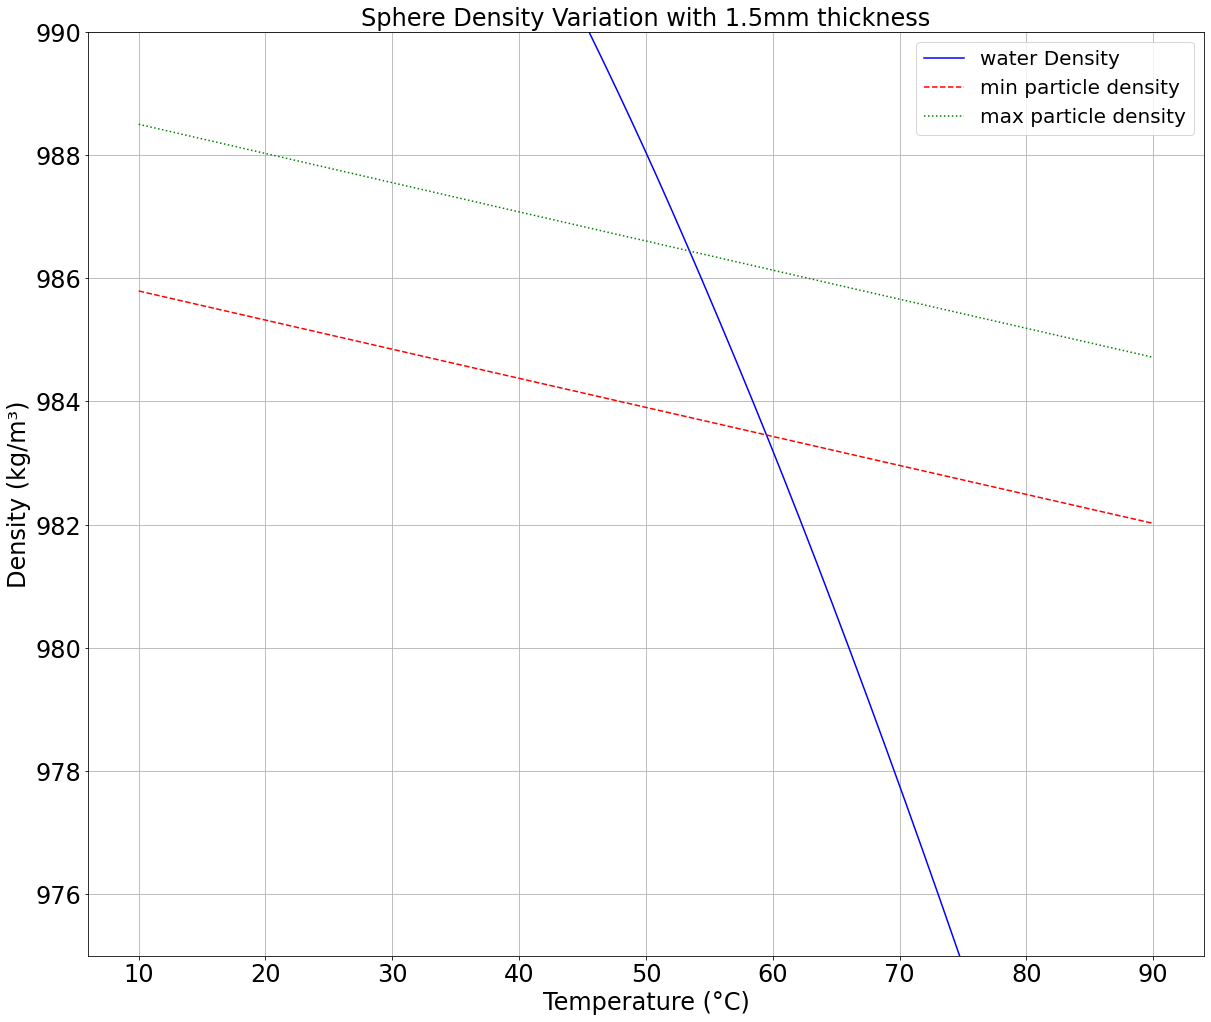

In [11]:
############################### Sphere Density Variation with 1.5 mm thickness ###########################
rho = 8000
x_i = 0.03484         #value in meters x = 34.89mm
t = 0.0015
pi = 3.141592
a = 16*10**-6
DT = 30

m_i = rho*4/3*pi*(3*t*x_i**2-3*x_i*t**2+t**3)
Vp_i = 4/3*pi*(x_i**3)*(1+a*DT)**3
ρ_i = m_i/Vp_i

print(f"max mass: {m_i*1000:.4f} grams")
print(f"min density: {ρ_i:.4f} kg/m^3")

x_a = 0.03494        
m_a = rho*4/3*pi*(3*t*x_a**2-3*x_a*t**2+t**3)
Vp_a = 4/3*pi*(x_a**3)*(1+a*DT)**3
ρ_a = m_a/Vp_a

print(f"min mass: {m_a*1000:.4f} grams")
print(f"max density: {ρ_a:.4f} kg/m^3")

temperature_data = np.array([10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100])
density_data = np.array([999.7, 999.1, 998.21, 997.05, 995.65, 994.03, 992.22, 990.21, 988.04, 985.69, 
                         983.2, 980.55, 977.76, 974.84, 971.79, 968.61, 965.31, 961.89, 958.35])
To = 20
x_values = np.linspace(10, 90, 500)
interpolated_density = interp1d(temperature_data, density_data, kind='cubic')
y2min_values = ρ_a / (1 + 3 * a * (x_values - To))  # Equation 2
y2max_values = ρ_i / (1 + 3 * a * (x_values - To))  # Equation 3
y_values = interpolated_density(x_values)  # Interpolated density values
plt.figure(figsize=(20, 17))
plt.tick_params(axis='both', labelsize=24)  # Increase tick label size for both axes
plt.plot(x_values, y_values, label="water Density ", color='blue', linestyle='solid')
plt.plot(x_values, y2min_values, label= 'min particle density', color='red', linestyle='dashed')
plt.plot(x_values, y2max_values, label= 'max particle density', color='green', linestyle='dotted')
plt.title("Sphere Density Variation with 1.5mm thickness", fontsize=24)
plt.xlabel("Temperature (°C)", fontsize=24)
plt.ylabel("Density (kg/m³)", fontsize=24)
plt.legend(fontsize=20)
plt.ylim([975, 990])
plt.grid(True)
plt.show()


max mass: 419.2480 grams
min density: 983.8368 kg/m^3
max mass: 421.0861 grams
min density: 981.8240 kg/m^3


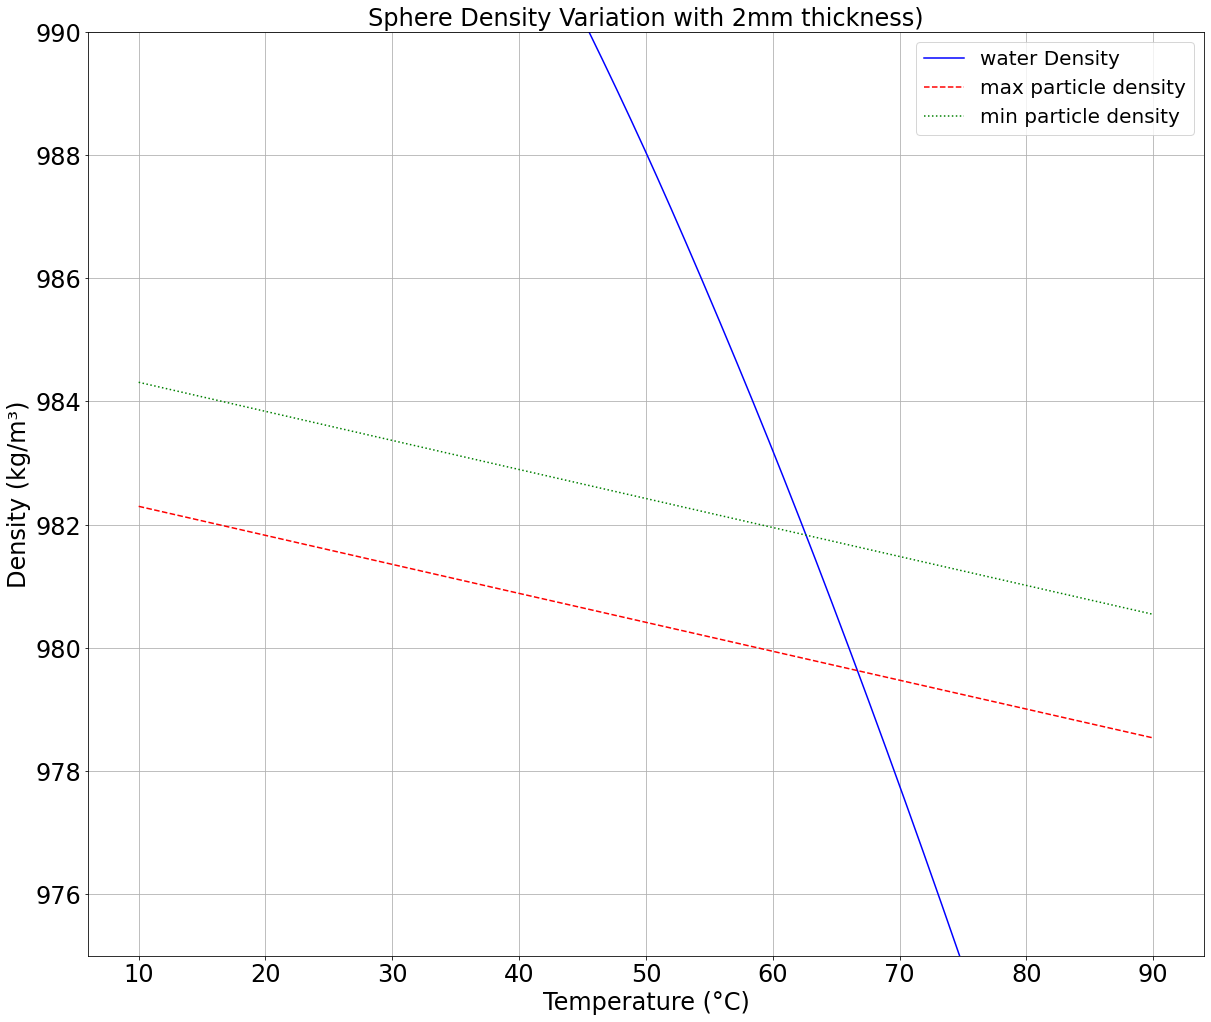

In [10]:
################################## Sphere Density Variation with 2mm thickness  ###########################
rho = 8000
x_i = 0.04666         #value in meters x = 46.61mm
t = 0.002
pi = 3.141592
a = 16*10**-6
DT = 30

m_i = rho*4/3*pi*(3*t*x_i**2-3*x_i*t**2+t**3)
Vp_i = 4/3*pi*(x_i**3)*(1+a*DT)**3
ρ_i = m_i/Vp_i

print(f"max mass: {m_i*1000:.4f} grams")
print(f"min density: {ρ_i:.4f} kg/m^3")

x_a = 0.04676        
m_a = rho*4/3*pi*(3*t*x_a**2-3*x_a*t**2+t**3)
Vp_a = 4/3*pi*(x_a**3)*(1+a*DT)**3
ρ_a = m_a/Vp_a

print(f"max mass: {m_a*1000:.4f} grams")
print(f"min density: {ρ_a:.4f} kg/m^3")

temperature_data = np.array([10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100])
density_data = np.array([999.7, 999.1, 998.21, 997.05, 995.65, 994.03, 992.22, 990.21, 988.04, 985.69, 
                         983.2, 980.55, 977.76, 974.84, 971.79, 968.61, 965.31, 961.89, 958.35])
To = 20
x_values = np.linspace(10, 90, 500)
interpolated_density = interp1d(temperature_data, density_data, kind='cubic')
y2min_values = ρ_a / (1 + 3 * a * (x_values - To))  # Equation 2
y2max_values = ρ_i / (1 + 3 * a * (x_values - To))  # Equation 3
y_values = interpolated_density(x_values)  # Interpolated density values
plt.figure(figsize=(20, 17))
plt.tick_params(axis='both', labelsize=24)  # Increase tick label size for both axes
plt.plot(x_values, y_values, label="water Density ", color='blue', linestyle='solid')
plt.plot(x_values, y2min_values, label= 'max particle density', color='red', linestyle='dashed')
plt.plot(x_values, y2max_values, label= 'min particle density', color='green', linestyle='dotted')
plt.title("Sphere Density Variation with 2mm thickness)", fontsize=24)
plt.xlabel("Temperature (°C)", fontsize=24)
plt.ylabel("Density (kg/m³)", fontsize=24)
plt.legend(fontsize=20)
plt.ylim([975, 990])
plt.grid(True)
plt.show()


Radius (mm) | Mass (g)
--------------------
20           | 38.235269
30           | 87.495432
40           | 156.861783
50           | 246.334323


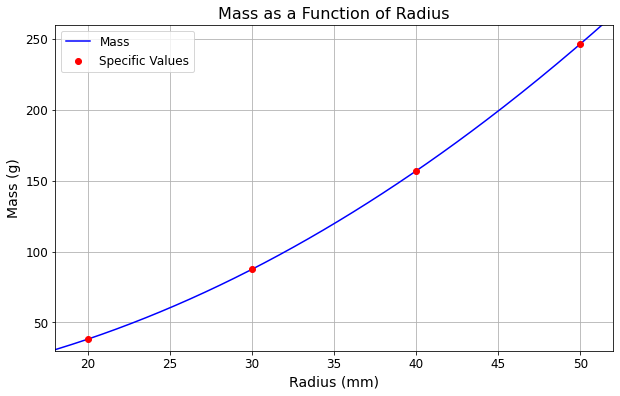

In [15]:
############################# Mass as a function of Radius #############################
rho = 8000  # kg/m^3
t = 0.001   # meters
pi = 3.141592  # Approximate value of π

# Define the equation for mass
def mass_equation(x):
    return rho * (4/3) * pi * (3 * t * x**2 - 3 * x * t**2 + t**3) * 1000  # Convert to grams

# Specific x values to evaluate (in mm)
specific_x_values = [20, 30, 40, 50]  # mm
specific_x_values_m = np.array(specific_x_values) / 1000  # Convert mm to meters
specific_m_values = mass_equation(specific_x_values_m)

print("Radius (mm) | Mass (g)")
print("--------------------")
for x, m in zip(specific_x_values, specific_m_values):
    print(f"{x:<12} | {m:.6f}")

# Generate x values for plotting (converted to meters)
x_values = np.linspace(10, 100, 500) / 1000  # Convert mm to meters
m_values = mass_equation(x_values)  # Compute m values

plt.figure(figsize=(10, 6))
plt.plot(x_values * 1000, m_values, label='Mass', color='b')
plt.scatter(specific_x_values, specific_m_values, color='red', label='Specific Values', zorder=3)

plt.xlabel("Radius (mm)", fontsize=14)
plt.ylabel("Mass (g)", fontsize=14)
plt.title("Mass as a Function of Radius", fontsize=16)
plt.legend(fontsize=12)
plt.grid(True)
plt.xlim([18, 52])
plt.ylim([30, 260])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

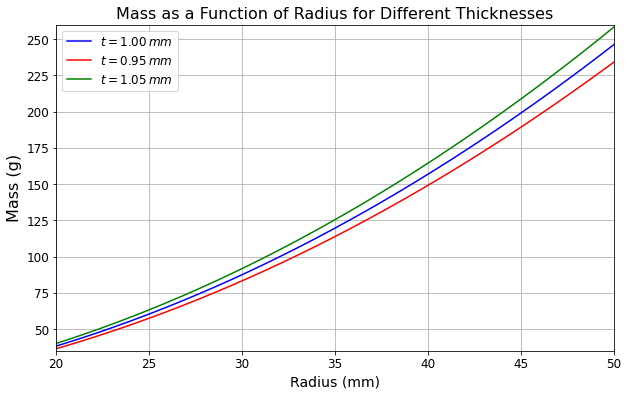

In [14]:
################### Mass as a Function of Radius for Different Thicknesses #######################

rho = 8000  # kg/m^3
pi = 3.141592  # Approximate value of π

# Function to compute mass for a given thickness t
def mass_equation(x, t):
    return rho * (4/3) * pi * (3 * t * x**2 - 3 * x * t**2 + t**3) * 1000  # Convert to grams

# Generate x values from 10 to 100 mm (converted to meters)
x_values = np.linspace(10, 100, 500) / 1000  # Convert mm to meters

# Define different t values
t_values = [0.001, 0.00095, 0.00105]
labels = [r'$t = 1.00 \, mm$', r'$t = 0.95 \, mm$', r'$t = 1.05 \, mm$']
colors = ['b', 'r', 'g']

# Plot each curve
plt.figure(figsize=(10, 6))
for t, label, color in zip(t_values, labels, colors):
    m_values = mass_equation(x_values, t)
    plt.plot(x_values * 1000, m_values, label=label, color=color)

plt.xlabel("Radius (mm)", fontsize=14)
plt.ylabel("Mass (g)", fontsize=16)
plt.title("Mass as a Function of Radius for Different Thicknesses", fontsize=16)
plt.legend(fontsize=12)
plt.grid(True)
plt.xlim([20, 50])
plt.ylim([35, 260])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()